In [67]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
plateaus = getters.get_plateaus()

/afs/cern.ch/user/d/dunetms/FBG_TMS
/afs/cern.ch/user/d/dunetms/FBG_TMS/ana_tools/plateaus.json


Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:20<00:00,  1.27s/it]


Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [00:50<00:00,  2.51s/it]


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 18/18 [00:28<00:00,  1.56s/it]


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 21/21 [00:41<00:00,  1.99s/it]


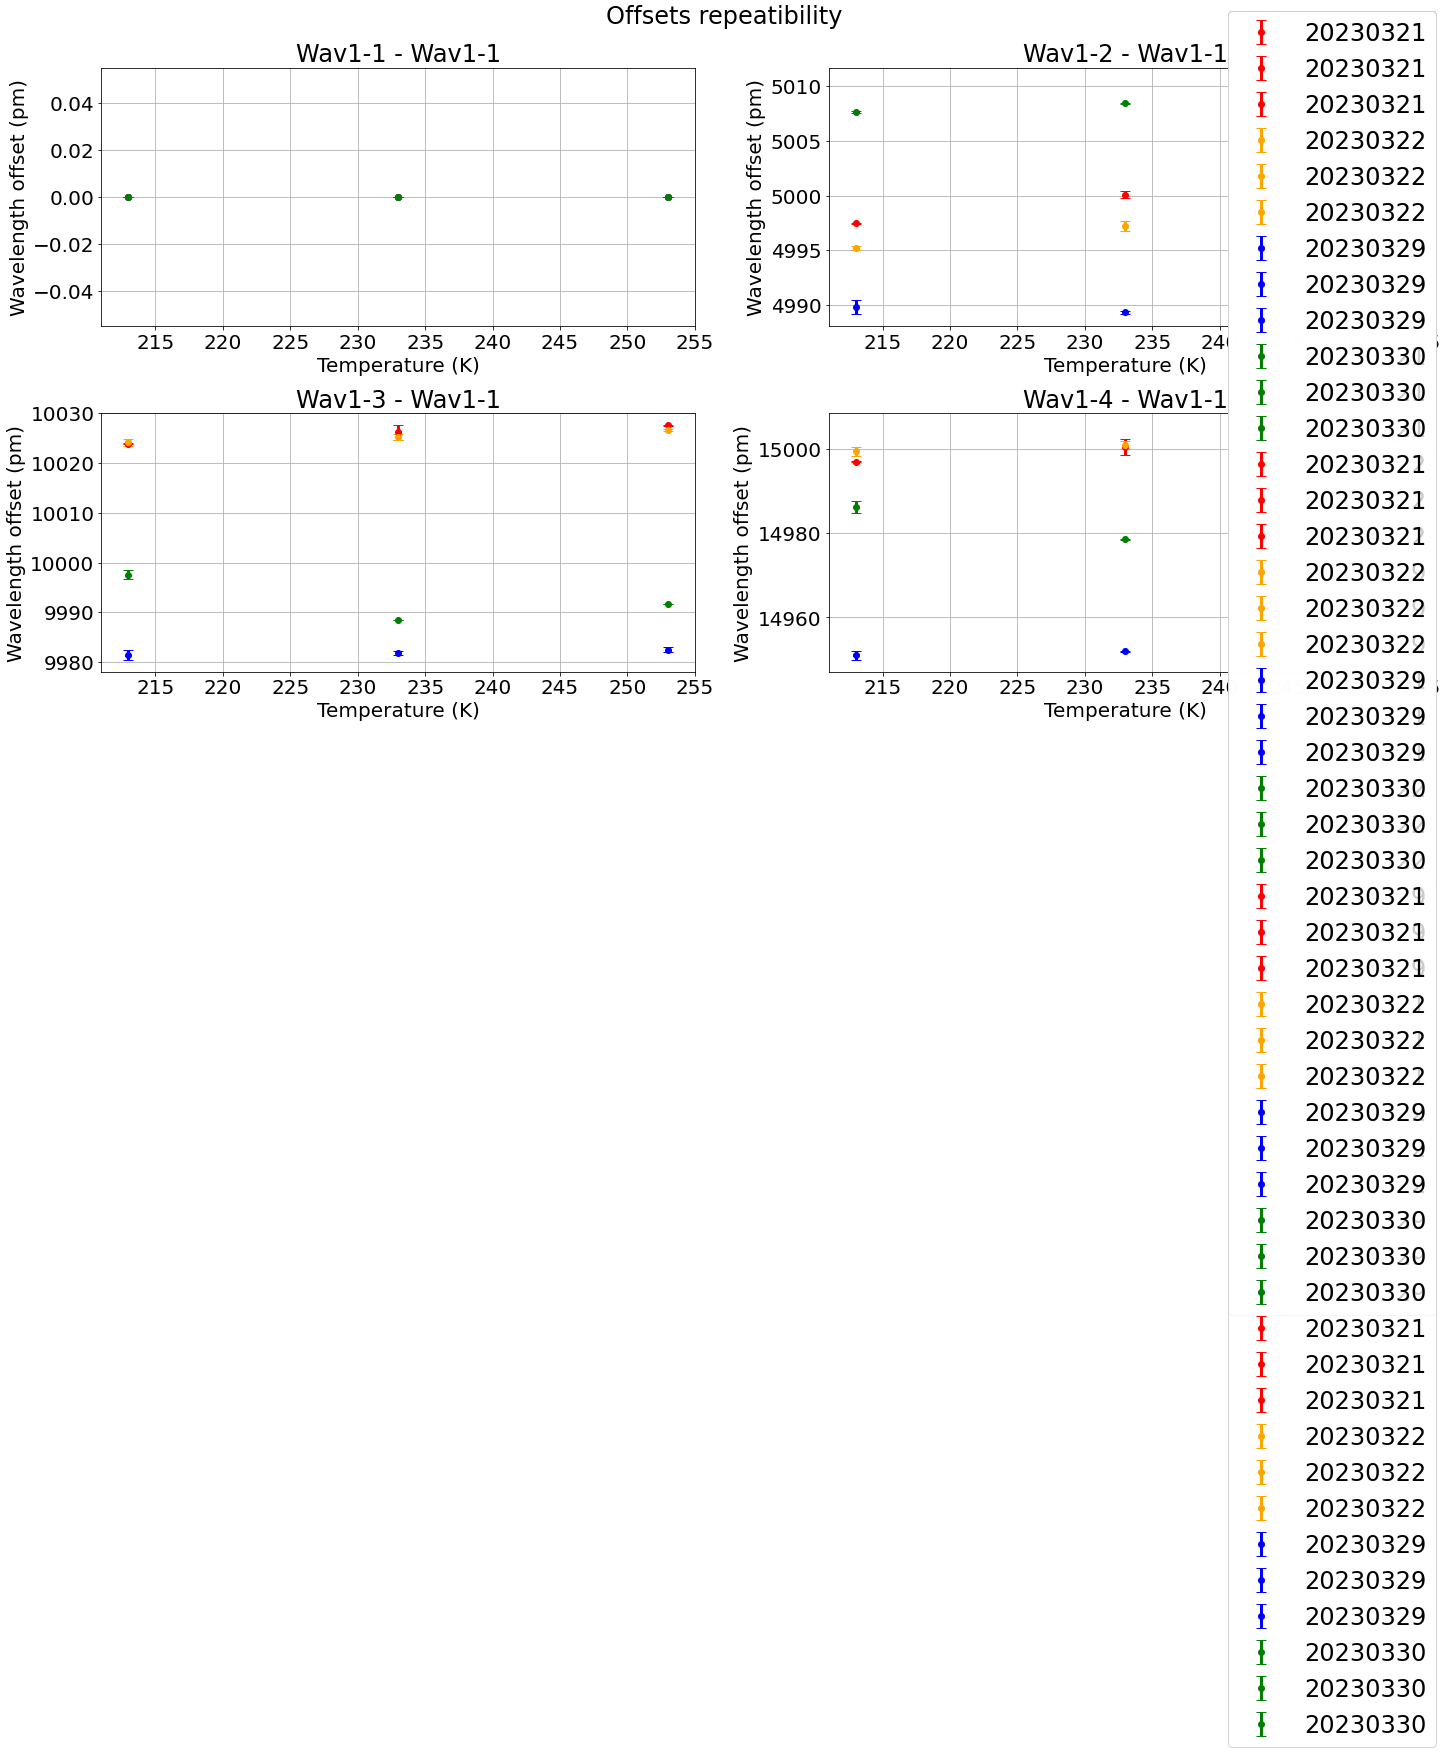

In [76]:
dates = ["20230321","20230322","20230329", "20230330"]
colors = {"20230321":"red","20230322":"orange","20230329":"blue", "20230330":"green"}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches(20, 10)
fig.suptitle("Offsets repeatibility")
for date in dates:
    peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        if plateau=="273_down":
            continue
        cnt = 0
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        for sens in peaks.columns:
            if sens == "Timestamp" or sens[3]=="2" or sens=="Wav1-5":
                continue
            axes[cnt].errorbar(int(plateau.split("_")[0]),
                            1e12*np.mean(pcut[sens]-pcut["Wav1-1"]),
                            fmt="o",
                            yerr=1e12*np.std(pcut[sens]-pcut["Wav1-1"]),
                            capsize=5,
                            color=colors[date],
                            label=date)
            axes[cnt].set_title(sens + " - Wav1-1")
            axes[cnt].set_xlabel("Temperature (K)")
            axes[cnt].set_ylabel("Wavelength offset (pm)")
            cnt += 1
    fig.legend()